In [217]:
import numpy as np
import pandas as pd

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

In [218]:
bank = pd.read_csv('bankData.csv')

1. Perform the required data cleaning and attribute relevance analysis to shortlist the required
attributes for a Bayesian based classification model




In [219]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [220]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [221]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [222]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [223]:
#bank['y'] = bank['y'].map({'yes': 1, 'no': 0})

In [224]:
dummies = []

In [225]:
for col in bank.columns:
    if(bank[col].dtype=='object'):
        dummies.append(col)

In [226]:
from sklearn import preprocessing
def encoding_transformer():    
    le = preprocessing.LabelEncoder()
    for att in dummies:
        le.fit(bank[att])
        bank[att] = le.transform(bank[att])
        print(le.classes_)
        print(le.transform(le.classes_))
    bank.drop(columns = ['balance','pdays'])
    banksample0 = bank[bank['y']==0].sample(n=521)
    bank1 = bank[bank['y']==1]
    banks = [banksample0, bank1]
    bank_under_sample = pd.concat(banks)
    

2. Use the scikit learn pipelines to perform the preprocessing - standardizing, encoding and
model fitting in one step.

In [229]:
x = bank.loc[:, bank.columns != 'y']
y = bank['y']
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=0)

In [230]:
X_new = SelectKBest(f_regression, k=5).fit(x, y)

ValueError: could not convert string to float: 'unemployed'

In [231]:
cols = X_new.get_support(indices=True)
new = x.iloc[:,cols]
new.columns

Index(['balance', 'housing', 'loan', 'month', 'campaign'], dtype='object')

In [232]:
x1 = bank_under_sample[['housing', 'loan', 'contact', 'duration', 'previous']]
y1 = bank_under_sample['y']
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1,random_state=0)

In [233]:
pipe = Pipeline([('encoder', encoding_transformer()),('scaler', StandardScaler()),
    ('nb',GaussianNB())
])

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
[ 0  1  2  3  4  5  6  7  8  9 10 11]
['divorced' 'married' 'single']
[0 1 2]
['primary' 'secondary' 'tertiary' 'unknown']
[0 1 2 3]
['no' 'yes']
[0 1]
['no' 'yes']
[0 1]
['no' 'yes']
[0 1]
['cellular' 'telephone' 'unknown']
[0 1 2]
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
[ 0  1  2  3  4  5  6  7  8  9 10 11]
['failure' 'other' 'success' 'unknown']
[0 1 2 3]
['no' 'yes']
[0 1]


In [234]:
pipe.fit(x_train1, y_train1)

Pipeline(steps=[('encoder', None), ('scaler', StandardScaler()),
                ('nb', GaussianNB())])

In [235]:
pipe.score(x_test1, y_test1)

0.7279693486590039

In [236]:
coef_array = pipe.named_steps['nb'].coef_

AttributeError: 'GaussianNB' object has no attribute 'coef_'

In [237]:
y_pred1 = pipe.predict(x_test1)

3. Perform Bayes classification using cross validation.

In [238]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(GaussianNB(),x_train1, y_train1, cv=5)

In [239]:
score

array([0.69426752, 0.79487179, 0.76923077, 0.68589744, 0.78846154])

4. Tabulate and write down the relevant measures of accuracy , Sensitivity and specificity.

In [240]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test1, y_pred1).ravel()
print(tn, fp, fn, tp)

100 19 52 90


In [241]:
acc =(tp+tn)/(tp+fp+fn+tn)
sens = tp/(tp+fn)
spec = tn/(tn+fp)

In [242]:
print(acc, sens, spec)

0.7279693486590039 0.6338028169014085 0.8403361344537815


5. Visualize the ROC curve and write down the roc_auc and comment on the performance of
the classifier.

In [243]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(y_test1, y_pred1)

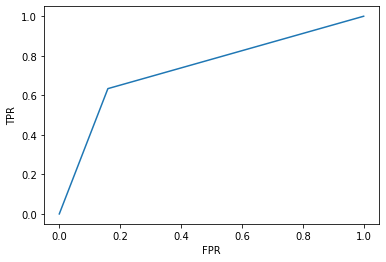

In [244]:
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [245]:
roc_auc_score(y_test1, y_pred1)

0.7370694756775951